# Hardware project: Weather Forecasting with Arduino Temperature and Luminance Sensors Group 13

Elliot Alexander Ferning, 105003
Hallvard Bjørgen, 105243
Manuel Sach, 105357
Miguel Cruz Irimia, 104537

Professors: Jo ̃ao Sousa, Jo ̃ao Santos

# **Get temperature from API**

In [ ]:
import requests

# Replace with the latitude and longitude of the location you want to get weather data for
latitude = 38.72
longitude = -9.13

# Replace with the start and end date in the format 'yyyy-mm-dd'
start_date = '2022-01-01'
end_date = '2023-01-01'

url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m'

response = requests.get(url)

data = response.json()

In [ ]:
import pandas as pd
df = pd.DataFrame(data['hourly'])
df.head(365)

,time,temperature_2m
0,2022-01-01T00:00,14.3
1,2022-01-01T01:00,14.0
2,2022-01-01T02:00,13.8
3,2022-01-01T03:00,13.6
4,2022-01-01T04:00,13.3
...,...,...
360,2022-01-16T00:00,11.2
361,2022-01-16T01:00,11.0
362,2022-01-16T02:00,10.8
363,2022-01-16T03:00,10.6


Plot the temperature against time

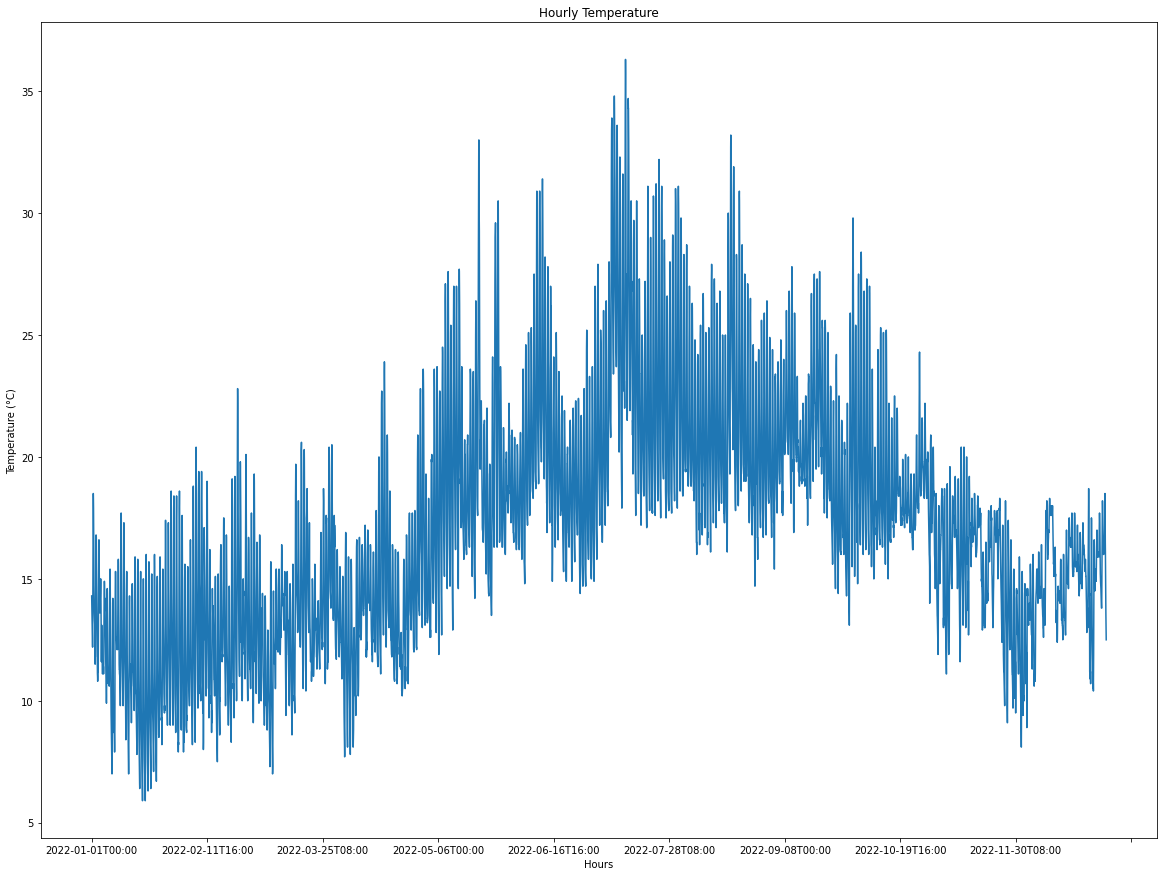

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# Replace with the data you want to plot
x = df['time']
y = df['temperature_2m']

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the data
ax.plot(x, y)

# Set labels for the x and y axis
ax.set_xlabel('Hours')
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
ax.set_ylabel('Temperature (°C)')

# Set title for the plot
ax.set_title('Hourly Temperature')

# Show the plot
plt.show()

## Data preprocessing


In [ ]:
import pandas as pd

# load data into a dataframe
df = pd.DataFrame(data['hourly'])

# Convertir la columna de fecha en un tipo de fecha
df['fecha'] = pd.to_datetime(df['time'])

# Establecer la columna de fecha como el índice del DataFrame
df.set_index('fecha', inplace=True)

# Eliminar las filas con valores faltantes
df.dropna(inplace=True)

# Agrupar los datos por mes y calcular la temperatura promedio
df_agrupado = df.groupby(df.index.month).mean()


Relationship between temperature and hour:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            8784 non-null   object 
 1   temperature_2m  8784 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.4+ KB
None
       temperature_2m
count     8784.000000
mean        17.301526
std          4.908199
min          5.900000
25%         13.800000
50%         17.000000
75%         20.100000
max         36.300000


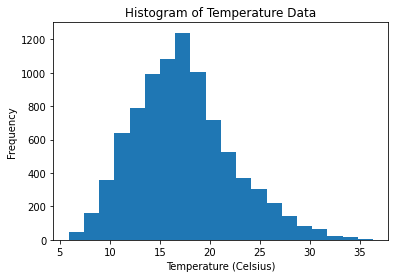

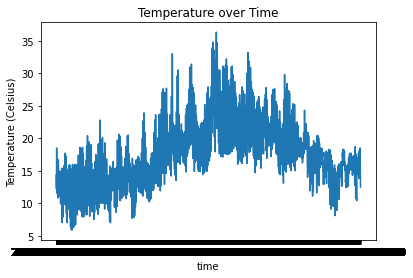

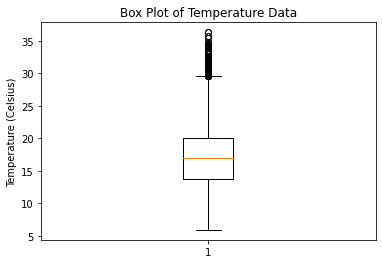

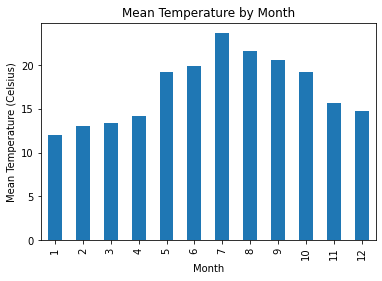

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load the temperature dataset
df = pd.DataFrame(data['hourly'])

# print basic information about the dataset
print(df.info())

# calculate basic statistics
print(df.describe())

# plot a histogram of the temperature data
plt.hist(df['temperature_2m'], bins = 20)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Data')
plt.show()

# plot a line graph of the temperature data over time
plt.plot(df['time'], df['temperature_2m'])
plt.xlabel('time')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature over Time')
plt.show()

# plot a box plot of the temperature data
plt.boxplot(df['temperature_2m'])
plt.ylabel('Temperature (Celsius)')
plt.title('Box Plot of Temperature Data')
plt.show()
# convert time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# group the temperature data by month and calculate the mean temperature for each month
monthly_temperatures = df.groupby(df['time'].dt.month)['temperature_2m'].mean()

# plot the mean temperature for each month
monthly_temperatures.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (Celsius)')
plt.title('Mean Temperature by Month')
plt.show()

# Arduino code

In [ ]:
## This is arduino-code to read from sensors and print to "Serial". Do not run this!
int temp1 = 0;
int temp2=1;
int temp3=2;
int lum1 = 3;
int lum2=4;
int lum3=5;

int temp_val1;
int temp_val2;
int temp_val3;
int lum_val1;
int lum_val2;
int lum_val3;

void setup() {
  Serial.begin(9600);
}

void loop() {
  lum_val1 = analogRead(lum1);
  lum_val2 = analogRead(lum2);
  lum_val3 = analogRead(lum3);
  temp_val1 =analogRead(temp1);
  temp_val2 =analogRead(temp2);
  temp_val3 =analogRead(temp3);
  Serial.print(temp_val1);
  Serial.print(';');  
  Serial.print(temp_val2);
  Serial.print(';'); 
  Serial.print(temp_val3);
  Serial.print(';'); 
  Serial.print(lum_val1);
  Serial.print(';'); 
  Serial.print(lum_val2);
  Serial.print(';');
  Serial.println(lum_val3);
  
 
  delay(30000);

}


SyntaxError: ignored

In [ ]:
## This code is to retrieve sensor data from Arduino and save in a .CSV data file. Do not run this!

import serial # module for serial communication with Arduino
import csv # module for working with CSV files
import time # module for adding delay

# Create a serial object to communicate with Arduino
ser = serial.Serial('COM3', 9600) # Connection to the arduino and the baudrate

# Name of the CSV file
filename = "sensor_data.csv"

# Open the file and write the headers
with open(filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Timestamp', 'Sensor Value'])

while True:
    # Read data from the serial port
    data = ser.readline().decode().strip()

    # Split the data into timestamp and sensor value
    timestamp = time.time()
    sensor_value = data

    # Append the data to the CSV file
    with open(filename, 'a', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow([timestamp, sensor_value])

    # Print the data
    print("Timestamp:", timestamp)
    print("Sensor Value:", sensor_value)
    print()

    # Add delay
    time.sleep(1)


In [ ]:
## Read data sensor data csv and combine them.
import pandas as pd
df_1 = pd.read_csv("sensor_data_sunday.csv",delimiter=';')
df_2 = pd.read_csv("sensor_data_tuesday.csv",delimiter=';')
df_3 = pd.read_csv("sensor_data_wednesday.csv",delimiter=';')
df_arduino = pd.concat([df_1, df_2,df_3], axis=0)

df_arduino.head()

,Timestamp,Temperature1,Temperature2,Temperature3,Luminance1,Luminance2,Luminance3
0,1.673796e+09,387,385,384,244,864,858
1,1.673796e+09,356,354,353,199,870,865
2,1.673796e+09,362,360,359,196,903,899
3,1.673796e+09,356,354,353,200,867,866
4,1.673796e+09,361,359,357,203,879,877


**As we can see, there is no real correlation between temperature and luminance. Exeptation is luminance 1 sensor readings, which can be explained by an obvious sensor error. Luminance 1 column should be dropped.**

In [ ]:
# drop luminance 1 because of obvious systematic error in lumunance sensor 1.

df_arduino=df_arduino.drop(columns = 'Luminance1')

print(df_arduino)

        Timestamp  Temperature1  Temperature2  Temperature3  Luminance2  \
0    1.673796e+09           387           385           384         864   
1    1.673796e+09           356           354           353         870   
2    1.673796e+09           362           360           359         903   
3    1.673796e+09           356           354           353         867   
4    1.673796e+09           361           359           357         879   
..            ...           ...           ...           ...         ...   
232  1.674049e+09           352           350           348         631   
233  1.674049e+09           353           351           350         629   
234  1.674049e+09           368           367           365         632   
235  1.674049e+09           392           390           389         635   
236  1.674049e+09           391           389           388         612   

     Luminance3  
0           858  
1           865  
2           899  
3           866  
4        

In [ ]:
# Convert data into desired time format and temperature unit
import math
from datetime import datetime

df_arduino['date'] = pd.to_datetime(df_arduino['Timestamp'], unit='s').dt.strftime('%d-%m-%Y %H:%M:%S')
df_1['date'] = pd.to_datetime(df_1['Timestamp'], unit='s').dt.strftime('%d-%m-%Y %H:%M:%S')
df_2['date'] = pd.to_datetime(df_2['Timestamp'], unit='s').dt.strftime('%d-%m-%Y %H:%M:%S')
df_3['date'] = pd.to_datetime(df_3['Timestamp'], unit='s').dt.strftime('%d-%m-%Y %H:%M:%S')
#convert temperature from analog to celcius (50/1024), note that these temperatures was taken in sunlight, might affect result.
# only run code once, it overwrites the values in columns each time.
df_1['Temperature1']=df_1['Temperature1']*(50/1024)
df_2['Temperature1']=df_2['Temperature1']*(50/1024)
df_3['Temperature1']=df_3['Temperature1']*(50/1024)

df_arduino['Temperature1']=df_arduino['Temperature1']*(50/1024)
df_arduino['Temperature2']=df_arduino['Temperature2']*(50/1024)
df_arduino['Temperature3']=df_arduino['Temperature3']*(50/1024)
df_arduino.head(100)

,Timestamp,Temperature1,Temperature2,Temperature3,Luminance2,Luminance3,date
0,1.673796e+09,18.896484,18.798828,18.750000,864,858,15-01-2023 15:22:03
1,1.673796e+09,17.382812,17.285156,17.236328,870,865,15-01-2023 15:22:33
2,1.673796e+09,17.675781,17.578125,17.529297,903,899,15-01-2023 15:23:03
3,1.673796e+09,17.382812,17.285156,17.236328,867,866,15-01-2023 15:23:33
4,1.673796e+09,17.626953,17.529297,17.431641,879,877,15-01-2023 15:24:03
...,...,...,...,...,...,...,...
95,1.673799e+09,17.041016,16.943359,16.845703,781,773,15-01-2023 16:09:34
96,1.673799e+09,17.187500,17.138672,17.041016,780,774,15-01-2023 16:10:04
97,1.673799e+09,16.894531,16.748047,16.699219,776,773,15-01-2023 16:10:34
0,1.673955e+09,20.849609,20.703125,20.605469,956,970,17-01-2023 11:21:52


In [ ]:
# Calculate the discrepancy between the sensors

df_arduino['discrepancy_temp'] = abs(df_arduino['Temperature1'] - df_arduino['Temperature2']) + abs(df_arduino['Temperature2'] - df_arduino['Temperature3']) + abs(df_arduino['Temperature3'] - df_arduino['Temperature1'])
df_arduino['discrepancy_lum'] =  abs(df_arduino['Luminance2'] - df_arduino['Luminance3'])
print(df_arduino)


        Timestamp  Temperature1  Temperature2  Temperature3  Luminance2  \
0    1.673796e+09     18.896484     18.798828     18.750000         864   
1    1.673796e+09     17.382812     17.285156     17.236328         870   
2    1.673796e+09     17.675781     17.578125     17.529297         903   
3    1.673796e+09     17.382812     17.285156     17.236328         867   
4    1.673796e+09     17.626953     17.529297     17.431641         879   
..            ...           ...           ...           ...         ...   
232  1.674049e+09     17.187500     17.089844     16.992188         631   
233  1.674049e+09     17.236328     17.138672     17.089844         629   
234  1.674049e+09     17.968750     17.919922     17.822266         632   
235  1.674049e+09     19.140625     19.042969     18.994141         635   
236  1.674049e+09     19.091797     18.994141     18.945312         612   

     Luminance3                 date  discrepancy_temp  discrepancy_lum  
0           858  15-01-20

Check the correlation between temperature and luminance

In [ ]:
print from scipy.stats import pearsonr

## Calculate the correlations between the columns
df_compare=df_arduino.drop(columns=['Timestamp','date','discrepancy_temp','discrepancy_lum'])
df_corrs = df_compare.corr(method='pearson')

print(df_corrs)

              Temperature1  Temperature2  Temperature3  Luminance2  Luminance3
Temperature1      1.000000      0.991963      0.987543   -0.048186   -0.062949
Temperature2      0.991963      1.000000      0.999370   -0.066120   -0.082406
Temperature3      0.987543      0.999370      1.000000   -0.071746   -0.088699
Luminance2       -0.048186     -0.066120     -0.071746    1.000000    0.976337
Luminance3       -0.062949     -0.082406     -0.088699    0.976337    1.000000


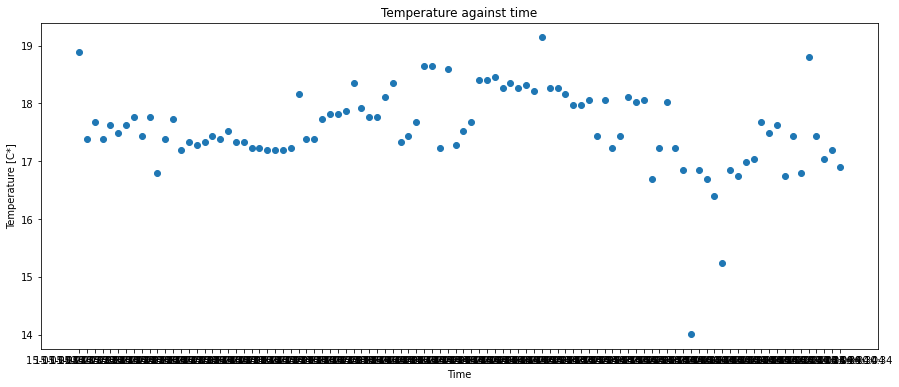

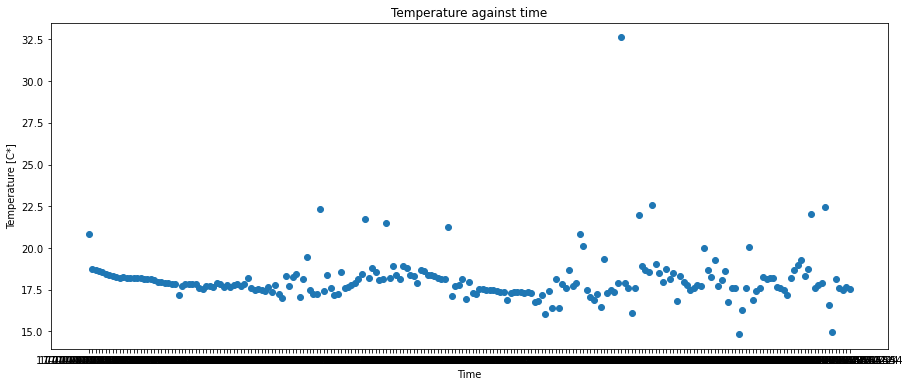

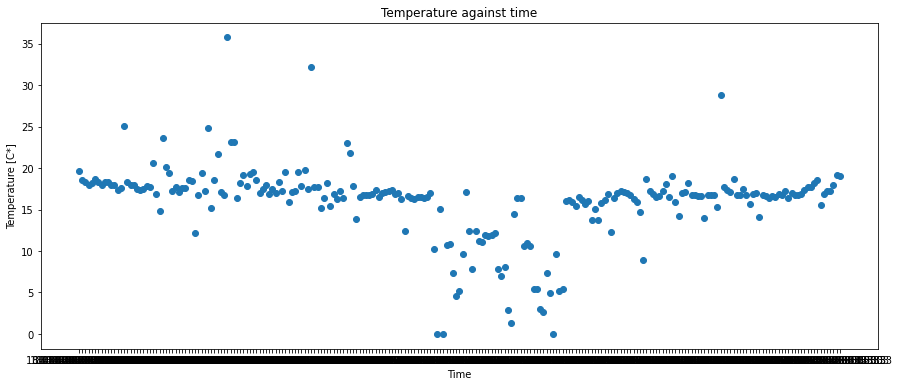

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# select columns to plot
x1 = df_1["date"]
y1 = df_1["Temperature1"]

x2 = df_2["date"]
y2 = df_2["Temperature1"]

x3 = df_3["date"]
y3 = df_3["Temperature1"]

# Create a scatter plot for dataframe 1
plt.scatter(x1, y1)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Temperature [C*]")
plt.title("Temperature against time")
# show plot
plt.show()

# repeat for dataframe 2
plt.scatter(x2, y2)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Temperature [C*]")
plt.title("Temperature against time")

plt.show()
# repeat for dataframe 3
plt.scatter(x3, y3)

# add labels and title
plt.xlabel("Time")
plt.ylabel("Temperature [C*]")
plt.title("Temperature against time")

# show plot
plt.show()

# Different models generated by OpenAI ( remove?)



In [ ]:
# ARIMA 

import numpy as np
import statsmodels.api as sm

# Assume that you have temperature and luminance data for the previous 4 days
# stored in the variables 'temp_data' and 'lum_data', respectively.


# We'll use the temperature data to train the ARIMA model
model = sm.tsa.ARIMA(temp_data, order=(1, 1, 1))
arima_fit = model.fit()

# Now we can use the fitted model to make predictions on new data
forecast, stderr, conf_int = arima_fit.forecast(2)

# The forecast array will contain temperature predictions for the next 2 hours
# The 'stderr' and 'conf_int' arrays contain standard error and confidence interval information
# for the predictions

# We can also use the luminance data to train a separate ARIMA model
lum_model = sm.tsa.ARIMA(lum_data, order=(1, 1, 1))
lum_arima_fit = lum_model.fit()

# And use this model to make luminance predictions
lum_forecast, lum_stderr, lum_conf_int = lum_arima_fit.forecast(2)

# The lum_forecast array will contain luminance predictions for the next 2 hours


In [ ]:
# DECISION TREE

import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Assume that you have temperature and luminance data for the previous 4 days
# stored in the variables 'temp_data' and 'lum_data', respectively.

# Combine the temperature and luminance data into a single dataset
data = np.column_stack([temp_data, lum_data])

# Define the decision tree model.
model = DecisionTreeRegressor()

# Now we can train the model using the data
model.fit(data, data)

# Now that the model is trained, we can use it to make predictions on new data
forecast = model.predict(data)

# The forecast array will contain temperature and luminance predictions
# for the next few hours


In [ ]:
# Feedforward neural network FNN

import torch
import torch.nn as nn

# Assume that you have temperature and luminance data for the previous 4 days
# stored in the variables 'temp_data' and 'lum_data', respectively.

# First, we'll combine the temperature and luminance data into a single dataset
data = torch.stack([temp_data, lum_data], dim=1)

# Next, we'll define the neural network.
# We'll use a single fully-connected hidden layer with 10 units, and a fully-connected
# output layer to predict temperature and luminance.

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = Net(2, 10, 2)

# Now we can train the model using an Adam optimizer and mean squared error loss
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

for epoch in range(100):
    # Clear the gradients
    optimizer.zero_grad()

    # Forward pass
    output = model(data)
    loss = loss_fn(output, data)

    # Backward pass
    loss.backward()
    optimizer.step()

# Now that the model is trained, we can use it to make predictions on new data
with torch.no_grad():
    forecast = model(data)

# The forecast tensor will contain temperature and luminance predictions
# for the next few hours


In [ ]:
# LSTM

import torch
import torch.nn as nn

# Assume that you have temperature and luminance data for the previous 4 days
# stored in the variables 'temp_data' and 'lum_data', respectively.

# First, we'll combine the temperature and luminance data into a single dataset
data = torch.stack([temp_data, lum_data], dim=1)

# Next, we'll define the LSTM model.
# We'll use a single LSTM layer with hidden size 10, and a fully-connected
# output layer to predict temperature and luminance.

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x)
        return x

model = LSTMModel(2, 10, 2)

# Now we can train the model using an Adam optimizer and mean squared error loss
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

for epoch in range(100):
    # Clear the gradients
    optimizer.zero_grad()

    # Forward pass
    output = model(data)
    loss = loss_fn(output, data)

    # Backward pass
    loss.backward()
    optimizer.step()

# Now that the model is trained, we can use it to make predictions on new data
with torch.no_grad():
    forecast = model(data)

# The forecast tensor will contain temperature and luminance predictions
# for the next few hours


In [ ]:
# Random forest

import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assume that you have temperature and luminance data for the previous 4 days
# stored in the variables 'temp_data' and 'lum_data', respectively.

# Combine the temperature and luminance data into a single dataset
data = np.column_stack([temp_data, lum_data])

# Define the random forest model. We'll use 10 decision trees in the forest.
model = RandomForestRegressor(n_estimators=10)

# Now we can train the model using the data
model.fit(data, data)

# Now that the model is trained, we can use it to make predictions on new data
forecast = model.predict(data)

# The forecast array will contain temperature and luminance predictions
# for the next few hours


In [ ]:
# SVM

import numpy as np
from sklearn.svm import SVR

# Assume that you have temperature and luminance data for the previous 4 days
# stored in the variables 'temp_data' and 'lum_data', respectively.

# Combine the temperature and luminance data into a single dataset
data = np.column_stack([temp_data, lum_data])

# Define the SVM model. We'll use a linear SVR model to make predictions.
model = SVR(kernel='linear')

# Now we can train the model using the data
model.fit(data, data)

# Now that the model is trained, we can use it to make predictions on new data
forecast = model.predict(data)

# The forecast array will contain temperature and luminance predictions
# for the next few hours


#More Pre-Processing and Model Fitting for API 


Pre-Processing for Training


In [ ]:
# Pre-Processing
import pandas as pd

# load data into a dataframe
df_default = pd.DataFrame(data['hourly'])

# replace missing values with the mean value
df_default.fillna(df_default.mean(), inplace=True)

# create a column with the day
df_default['day'] = pd.to_datetime(df_default['time']).dt.day

# create a column with the hour
df_default['hour'] = pd.to_datetime(df_default['time']).dt.hour

# group temperatures by hour and day
df_pretrain = df_default.groupby(['day','hour'], as_index=False)['temperature_2m'].mean()
df_pretrain

<ipython-input-92-9d313249880a>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_default.fillna(df_default.mean(), inplace=True)


,day,hour,temperature_2m
0,1,0,15.253846
1,1,1,14.976923
2,1,2,14.684615
3,1,3,14.415385
4,1,4,14.161538
...,...,...,...
739,31,19,18.742857
740,31,20,17.885714
741,31,21,17.285714
742,31,22,16.857143


Creating Training Dataframe


In [ ]:
columnNames = ['minus5', 'minus4', 'minus3', 'minus2', 'minus1', 'now', 'desired_time', 'target_value']

length_df = len(df_pretrain)

df_train = pd.DataFrame(index = range(length_df-6), columns = columnNames)


for ii in range(6,length_df):
    df_train.iloc[ii-6]['minus5'] = df_pretrain['temperature_2m'].values[ii-6]
    df_train.iloc[ii-6]['minus4'] = df_pretrain['temperature_2m'].values[ii-5]
    df_train.iloc[ii-6]['minus3'] = df_pretrain['temperature_2m'].values[ii-4]
    df_train.iloc[ii-6]['minus2'] = df_pretrain['temperature_2m'].values[ii-3]
    df_train.iloc[ii-6]['minus1'] = df_pretrain['temperature_2m'].values[ii-2]
    df_train.iloc[ii-6]['now'] = df_pretrain['temperature_2m'].values[ii-1]
    df_train.iloc[ii-6]['desired_time'] = df_pretrain['hour'].values[ii]
    df_train.iloc[ii-6]['target_value'] = df_pretrain['temperature_2m'].values[ii]

df_train


,minus5,minus4,minus3,minus2,minus1,now,desired_time,target_value
0,15.253846,14.976923,14.684615,14.415385,14.161538,14.0,6,13.853846
1,14.976923,14.684615,14.415385,14.161538,14.0,13.853846,7,14.061538
2,14.684615,14.415385,14.161538,14.0,13.853846,14.061538,8,14.592308
3,14.415385,14.161538,14.0,13.853846,14.061538,14.592308,9,15.953846
4,14.161538,14.0,13.853846,14.061538,14.592308,15.953846,10,17.376923
...,...,...,...,...,...,...,...,...
733,21.3,21.571429,21.471429,21.142857,20.571429,19.714286,19,18.742857
734,21.571429,21.471429,21.142857,20.571429,19.714286,18.742857,20,17.885714
735,21.471429,21.142857,20.571429,19.714286,18.742857,17.885714,21,17.285714
736,21.142857,20.571429,19.714286,18.742857,17.885714,17.285714,22,16.857143


Linear Regression ( this one shows r^2 = -0.010)?


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection
from random import sample
import numpy as np
import random


X_df = df_train.drop(columns = 'target_value')

X = X_df.values
y = df_train['target_value'].values.reshape(-1,1)



# Establish the idxs of each test and train datasets
test_size = 0.3 
seed = 100           
random.seed(seed)    
idxs_test = sample(range(df_train.shape[0]), int(test_size * df_train.shape[0]))
idxs_train = [i for i in range(df_train.shape[0]) if i not in idxs_test]

# Apply the polynomial transformation, for polynomial degrees of 2 and 10
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_2 = poly.fit_transform(X)

X_train = X_2[idxs_train,:]
X_test = X_2[idxs_test,:]

y_train = y[idxs_train,:]
y_test = y[idxs_test,:]

regr = LinearRegression()
regr.fit(X_train, y_train)
medv_pred = regr.predict(X_test)
r2_value = r2_score(y_test, medv_pred)

print('R^2 : {:.3f}'.format(r2_value))


R^2 : 0.997


with normalized temperature



In [ ]:
df_norm = df_pretrain.copy()

df_norm["normalized_temperature"] = (df_norm["temperature_2m"] - df_norm["temperature_2m"].min()) / (df_norm["temperature_2m"].max() - df_norm["temperature_2m"].min())

df_train_norm = pd.DataFrame(index = range(length_df-6), columns = columnNames)


for ii in range(6,length_df):
    df_train_norm.iloc[ii-6]['minus5'] = df_norm['normalized_temperature'].values[ii-6]
    df_train_norm.iloc[ii-6]['minus4'] = df_norm['normalized_temperature'].values[ii-5]
    df_train_norm.iloc[ii-6]['minus3'] = df_norm['normalized_temperature'].values[ii-4]
    df_train_norm.iloc[ii-6]['minus2'] = df_norm['normalized_temperature'].values[ii-3]
    df_train_norm.iloc[ii-6]['minus1'] = df_norm['normalized_temperature'].values[ii-2]
    df_train_norm.iloc[ii-6]['now'] = df_norm['normalized_temperature'].values[ii-1]
    df_train_norm.iloc[ii-6]['desired_time'] = df_norm['hour'].values[ii]
    df_train_norm.iloc[ii-6]['target_value'] = df_norm['normalized_temperature'].values[ii]

df_train_norm.head()

,minus5,minus4,minus3,minus2,minus1,now,desired_time,target_value
0,0.218252,0.189178,0.15849,0.130224,0.103574,0.086614,6,0.07127
1,0.189178,0.15849,0.130224,0.103574,0.086614,0.07127,7,0.093075
2,0.15849,0.130224,0.103574,0.086614,0.07127,0.093075,8,0.148799
3,0.130224,0.103574,0.086614,0.07127,0.093075,0.148799,9,0.291742
4,0.103574,0.086614,0.07127,0.093075,0.148799,0.291742,10,0.441147


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection
from random import sample
import random

X_df_norm = df_train_norm.drop(columns = 'target_value')

X_norm = X_df_norm.values
y_norm = df_train_norm['target_value'].values.reshape(-1,1)



# Establish the idxs of each test and train datasets
test_size = 0.3 
seed = 100           
random.seed(seed)    
idxs_test = sample(range(df_train_norm.shape[0]), int(test_size * df_train_norm.shape[0]))
idxs_train = [i for i in range(df_train_norm.shape[0]) if i not in idxs_test]

# Apply the polynomial transformation, for polynomial degrees of 2 and 10
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_2_norm = poly.fit_transform(X_norm)

X_train_norm = X_2_norm[idxs_train,:]
X_test_norm = X_2_norm[idxs_test,:]

y_train_norm = y[idxs_train,:]
y_test_norm = y[idxs_test,:]

regr_norm = LinearRegression()
regr_norm.fit(X_train_norm, y_train_norm)
medv_pred_norm = regr_norm.predict(X_test_norm)
r2_value_norm = r2_score(y_test_norm, medv_pred_norm)

print('R^2 : {:.3f}'.format(r2_value_norm))

R^2 : 0.997


Test without Polynomial Features


In [ ]:
df_lin = df_pretrain.copy()

columnNames = ['minus5', 'minus4', 'minus3', 'minus2', 'minus1', 'now', 'desired_time', 'target_value']

length_df = len(df_lin)

df_train_lin = pd.DataFrame(index = range(length_df-6), columns = columnNames)


for ii in range(6,length_df):
    df_train_lin.iloc[ii-6]['minus5'] = df_pretrain['temperature_2m'].values[ii-6]
    df_train_lin.iloc[ii-6]['minus4'] = df_pretrain['temperature_2m'].values[ii-5]
    df_train_lin.iloc[ii-6]['minus3'] = df_pretrain['temperature_2m'].values[ii-4]
    df_train_lin.iloc[ii-6]['minus2'] = df_pretrain['temperature_2m'].values[ii-3]
    df_train_lin.iloc[ii-6]['minus1'] = df_pretrain['temperature_2m'].values[ii-2]
    df_train_lin.iloc[ii-6]['now'] = df_pretrain['temperature_2m'].values[ii-1]
    df_train_lin.iloc[ii-6]['desired_time'] = df_pretrain['hour'].values[ii]
    df_train_lin.iloc[ii-6]['target_value'] = df_pretrain['temperature_2m'].values[ii]

df_train_lin.head()

,minus5,minus4,minus3,minus2,minus1,now,desired_time,target_value
0,15.253846,14.976923,14.684615,14.415385,14.161538,14.0,6,13.853846
1,14.976923,14.684615,14.415385,14.161538,14.0,13.853846,7,14.061538
2,14.684615,14.415385,14.161538,14.0,13.853846,14.061538,8,14.592308
3,14.415385,14.161538,14.0,13.853846,14.061538,14.592308,9,15.953846
4,14.161538,14.0,13.853846,14.061538,14.592308,15.953846,10,17.376923


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection
from random import sample
import matplotlib.pyplot as plt
import random


X_df = df_train_lin.drop(columns = 'target_value')

X = X_df.values
y = df_train_lin['target_value'].values.reshape(-1,1)

# Establish the idxs of each test and train datasets
test_size = 0.3 
seed = 100           
random.seed(seed)    
idxs_test = sample(range(df_train_lin.shape[0]), int(test_size * df_train_lin.shape[0]))
idxs_train = [i for i in range(df_train_lin.shape[0]) if i not in idxs_test]


X_train = X[idxs_train,:]
X_test = X[idxs_test,:]

y_train = y[idxs_train,:]
y_test = y[idxs_test,:]

regr = LinearRegression()
regr.fit(X_train, y_train)
medv_pred = regr.predict(X_test)
r2_value = r2_score(y_test, medv_pred)

print('R^2 : {:.3f}'.format(r2_value))

R^2 : 0.995


Trying other models

SVR- SUPPORT VECTOR REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import model_selection
from random import sample
import random

X_df = df_train_lin.drop(columns = 'target_value')

X = X_df.values
y = df_train_lin['target_value'].values.reshape(-1,1)

# Establish the idxs of each test and train datasets
test_size = 0.3 
seed = 100           
random.seed(seed)    
idxs_test = sample(range(df_train_lin.shape[0]), int(test_size * df_train_lin.shape[0]))
idxs_train = [i for i in range(df_train_lin.shape[0]) if i not in idxs_test]


X_train = X[idxs_train,:]
X_test = X[idxs_test,:]

y_train = y[idxs_train,:]
y_test = y[idxs_test,:]

# Specify the kernel function to be used
regr = SVR(kernel='poly'
#regr = SVR(kernel='rbf')
#regr = SVR(kernel='linea')
regr.fit(X_train, y_train)
medv_pred = regr.predict(X_test)
r2_value = r2_score(y_test, medv_pred)

print('R^2 : {:.3f}'.format(r2_value))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 : 0.989


Neural Networks


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn import model_selection
from random import sample
import random

X_df = df_train_lin.drop(columns = 'target_value')
X = X_df.values
y = df_train_lin['target_value'].values.reshape(-1,1)

# Establish the idxs of each test and train datasets
test_size = 0.3 
seed = 100           
random.seed(seed)    
idxs_test = sample(range(df_train_lin.shape[0]), int(test_size * df_train_lin.shape[0]))
idxs_train = [i for i in range(df_train_lin.shape[0]) if i not in idxs_test]


X_train = X[idxs_train,:]
X_test = X[idxs_test,:]

y_train = y[idxs_train,:]
y_test = y[idxs_test,:]

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
model.fit(X_train, y_train, epochs=100)

# Get the predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the r2_score
r2 = r2_score(y_test, y_test_pred)
print('R2 score:', r2)

Epoch 1/100
17/17 [==============================] - 1s 4ms/step - loss: 175.5120 - mae: 12.8930 - mse: 175.5120
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 48.9806 - mae: 6.4140 - mse: 48.9806
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 6.9426 - mae: 2.1175 - mse: 6.9426
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 4.4262 - mae: 1.6553 - mse: 4.4262
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 2.6318 - mae: 1.2093 - mse: 2.6318
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 1.9053 - mae: 1.1212 - mse: 1.9053
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 1.5369 - mae: 0.9654 - mse: 1.5369
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 1.3135 - mae: 0.9215 - mse: 1.3135
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 1.1469 - mae: 0.8512 - mse: 1.1469
Epoch 10/100
17/17 [=


#Data set for 365 days


In [24]:
import requests

# Replace with the latitude and longitude of the location you want to get weather data for
latitude = 38.72
longitude = -9.13

# Replace with the start and end date in the format 'yyyy-mm-dd'
start_date = '2022-01-01'
end_date = '2022-12-31'

url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m'

response = requests.get(url)

data_big = response.json()

In [25]:
from datetime import datetime
import pandas as pd

# load data into a dataframe
df_big = pd.DataFrame(data_big['hourly'])

# replace missing values with the mean value
df_big.fillna(df_big.mean(), inplace=True)

# create a column with the hour
df_big['hour'] = pd.to_datetime(df_big['time']).dt.hour

day_of_year= []
# Encoding date to integer
for ii in range(len(df_big)):
    day_of_year.append(datetime.strptime(df_big.iloc[ii]['time'],'%Y-%m-%dT%H:%M').timetuple().tm_yday)

df_big['timestamp'] = day_of_year

<ipython-input-25-90b46add607b>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_big.fillna(df_big.mean(), inplace=True)


In [26]:
columnNames = ['minus5', 'minus4', 'minus3', 'minus2', 'minus1', 'now', 'desired_time', 'dayofyear', 'target_value']

length_df = len(df_big)

df_train_big = pd.DataFrame(index = range(length_df-6), columns = columnNames)


for ii in range(6,length_df):
    df_train_big.iloc[ii-6]['minus5'] = df_big['temperature_2m'].values[ii-6]
    df_train_big.iloc[ii-6]['minus4'] = df_big['temperature_2m'].values[ii-5]
    df_train_big.iloc[ii-6]['minus3'] = df_big['temperature_2m'].values[ii-4]
    df_train_big.iloc[ii-6]['minus2'] = df_big['temperature_2m'].values[ii-3]
    df_train_big.iloc[ii-6]['minus1'] = df_big['temperature_2m'].values[ii-2]
    df_train_big.iloc[ii-6]['now'] = df_big['temperature_2m'].values[ii-1]
    df_train_big.iloc[ii-6]['desired_time'] = df_big['hour'].values[ii]
    df_train_big.iloc[ii-6]['target_value'] = df_big['temperature_2m'].values[ii]
    df_train_big.iloc[ii-6]['dayofyear'] = df_big['timestamp'].values[ii]

df_train_big.head()

,minus5,minus4,minus3,minus2,minus1,now,desired_time,dayofyear,target_value
0,14.3,14.0,13.8,13.6,13.3,13.0,6,1,12.6
1,14.0,13.8,13.6,13.3,13.0,12.6,7,1,12.3
2,13.8,13.6,13.3,13.0,12.6,12.3,8,1,12.2
3,13.6,13.3,13.0,12.6,12.3,12.2,9,1,12.6
4,13.3,13.0,12.6,12.3,12.2,12.6,10,1,14.2


In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection
from random import sample
import random


X_df = df_train_big.drop(columns = 'target_value')

X = X_df.values
y = df_train_big['target_value'].values.reshape(-1,1)



# Establish the idxs of each test and train datasets
test_size = 0.3 
seed = 100           
random.seed(seed)    
idxs_test = sample(range(df_train_big.shape[0]), int(test_size * df_train_big.shape[0]))
idxs_train = [i for i in range(df_train_big.shape[0]) if i not in idxs_test]


# Apply the polynomial transformation, for polynomial degrees of 2 and 10
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_2 = poly.fit_transform(X)

X_train = X_2[idxs_train,:]
X_test = X_2[idxs_test,:]

y_train = y[idxs_train,:]
y_test = y[idxs_test,:]

regr = LinearRegression()
regr.fit(X_train, y_train)
medv_pred = regr.predict(X_test)
r2_value = r2_score(y_test, medv_pred)


print('R^2 : {:.3f}'.format(r2_value))

R^2 : 0.994


#Reading and preparing Arduino Data


In [3]:
import pandas as pd
df_1 = pd.read_csv("sensor_data_sunday.csv",delimiter=';')
df_2 = pd.read_csv("sensor_data_tuesday.csv",delimiter=';')
df_3 = pd.read_csv("sensor_data_wednesday.csv",delimiter=';')

df_arduino = pd.concat([df_1, df_2,df_3], axis=0)

df_arduino.head()

,Timestamp,Temperature1,Temperature2,Temperature3,Luminance1,Luminance2,Luminance3
0,1.673796e+09,387,385,384,244,864,858
1,1.673796e+09,356,354,353,199,870,865
2,1.673796e+09,362,360,359,196,903,899
3,1.673796e+09,356,354,353,200,867,866
4,1.673796e+09,361,359,357,203,879,877


In [4]:
# Convert data into desired time format and temperature unit
import math
from datetime import datetime

df_arduino['date'] = pd.to_datetime(df_arduino['Timestamp'], unit='s').dt.strftime('%d-%m-%Y %H:%M:%S')
df_1['date'] = pd.to_datetime(df_1['Timestamp'], unit='s').dt.strftime('%d-%m-%Y %H:%M:%S')
df_2['date'] = pd.to_datetime(df_2['Timestamp'], unit='s').dt.strftime('%d-%m-%Y %H:%M:%S')
df_3['date'] = pd.to_datetime(df_3['Timestamp'], unit='s').dt.strftime('%d-%m-%Y %H:%M:%S')

#convert temperature from analog to celcius (50/1024), note that these temperatures was taken in sunlight, might affect result.
# only run code once, it overwrites the values in columns each time.
df_1['Temperature1']=df_1['Temperature1']*(50/1024)
df_2['Temperature1']=df_2['Temperature1']*(50/1024)
df_3['Temperature1']=df_3['Temperature1']*(50/1024)


df_arduino['Temperature1']=df_arduino['Temperature1']*(50/1024)
df_arduino['Temperature2']=df_arduino['Temperature2']*(50/1024)
df_arduino['Temperature3']=df_arduino['Temperature3']*(50/1024)
df_arduino.head(100)

,Timestamp,Temperature1,Temperature2,Temperature3,Luminance1,Luminance2,Luminance3,date
0,1.673796e+09,18.896484,18.798828,18.750000,244,864,858,15-01-2023 15:22:03
1,1.673796e+09,17.382812,17.285156,17.236328,199,870,865,15-01-2023 15:22:33
2,1.673796e+09,17.675781,17.578125,17.529297,196,903,899,15-01-2023 15:23:03
3,1.673796e+09,17.382812,17.285156,17.236328,200,867,866,15-01-2023 15:23:33
4,1.673796e+09,17.626953,17.529297,17.431641,203,879,877,15-01-2023 15:24:03
...,...,...,...,...,...,...,...,...
95,1.673799e+09,17.041016,16.943359,16.845703,219,781,773,15-01-2023 16:09:34
96,1.673799e+09,17.187500,17.138672,17.041016,222,780,774,15-01-2023 16:10:04
97,1.673799e+09,16.894531,16.748047,16.699219,215,776,773,15-01-2023 16:10:34
0,1.673955e+09,20.849609,20.703125,20.605469,240,956,970,17-01-2023 11:21:52


In [5]:
df_mean = df_arduino.drop(columns=['Luminance1','Luminance2','Luminance3'])

temp_mean = []

for iii in range(len(df_mean)):
  tm = (df_mean.iloc[iii]['Temperature1'] + df_mean.iloc[iii]['Temperature2'] + df_mean.iloc[iii]['Temperature3'])/3
  temp_mean.append(tm)

df_mean['temperature'] = temp_mean

df_ard_pretest = df_mean.drop(columns=['Timestamp','Temperature1','Temperature2','Temperature3'])

df_ard_pretest.head(200)


,date,temperature
0,15-01-2023 15:22:03,18.815104
1,15-01-2023 15:22:33,17.301432
2,15-01-2023 15:23:03,17.594401
3,15-01-2023 15:23:33,17.301432
4,15-01-2023 15:24:03,17.529297
...,...,...
97,17-01-2023 12:10:23,18.489583
98,17-01-2023 12:10:53,18.310547
99,17-01-2023 12:11:23,18.245443
100,17-01-2023 12:11:53,18.196615


In [6]:
from datetime import datetime

day_of_year= []
# Encoding date to integer
for ii in range(len(df_ard_pretest)):
    day_of_year.append(datetime.strptime(df_ard_pretest.iloc[ii]['date'],'%d-%m-%Y %H:%M:%S').timetuple().tm_yday)

df_ard_pretest['timestamp'] = day_of_year


hour = []
for ii in range(len(df_ard_pretest)):
    hour.append(datetime.strptime(df_ard_pretest.iloc[ii]['date'],'%d-%m-%Y %H:%M:%S').hour)

df_ard_pretest['desired_time'] = hour

df_ard_pre = df_ard_pretest.drop(columns = 'date').groupby(["timestamp","desired_time"], as_index=False).mean()
df_ard_pre.head(100)

,timestamp,desired_time,temperature
0,15,15,17.669571
1,15,16,16.813151
2,17,11,17.871522
3,17,12,18.031971
4,17,13,18.084717
5,18,11,18.742360
6,18,12,13.602973
7,18,13,16.861979


Getting missing data from API (15.1. 10-14h; 17.1. 8-10h; 


In [16]:
import requests

# Replace with the latitude and longitude of the location you want to get weather data for
latitude = 38.72
longitude = -9.13

# Replace with the start and end date in the format 'yyyy-mm-dd'
start_date = '2023-01-15'
end_date = '2023-01-18'

url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m'

response = requests.get(url)

data_fill = response.json()

In [18]:
from datetime import datetime
import pandas as pd

# load data into a dataframe
df_fill = pd.DataFrame(data_big['hourly'])

# replace missing values with the mean value
#df_fill.fillna(df_fill.mean(), inplace=True)

# create a column with the hour
df_fill['hour'] = pd.to_datetime(df_fill['time']).dt.hour

day_of_year= []
# Encoding date to integer
for ii in range(len(df_fill)):
    day_of_year.append(datetime.strptime(df_fill.iloc[ii]['time'],'%Y-%m-%dT%H:%M').timetuple().tm_yday)

df_fill['timestamp'] = day_of_year
df_fill_2 = df_fill.drop(columns = ['time'])
df_fill_2.head()

,temperature_2m,hour,timestamp
0,14.3,0,1
1,14.0,1,1
2,13.8,2,1
3,13.6,3,1
4,13.3,4,1


In [19]:
d = {'day': [15,15,15,15,15,17,17,17,17,18,18,18,18], 'hour': [14,13,12,11,10,10,9,8,7,10,9,8,7]}
times_needed = pd.DataFrame(data=d)
times_needed.head(20)


,day,hour
0,15,14
1,15,13
2,15,12
3,15,11
4,15,10
5,17,10
6,17,9
7,17,8
8,17,7
9,18,10


In [20]:
import pandas as pd

day_fill = []
hour_fill = []
temperature_fill = []
for i in range(len(df_fill)):
  for ii in range(len(times_needed)):
    if times_needed.iloc[ii]['day'] == df_fill_2.iloc[i]['timestamp'] and times_needed.iloc[ii]['hour'] == df_fill_2.iloc[i]['hour']:
      day_fill.append(df_fill_2.iloc[i]['timestamp'])
      hour_fill.append(df_fill_2.iloc[i]['hour'])
      temperature_fill.append(df_fill_2.iloc[i]['temperature_2m'])

for iii in range(len(df_ard_pre)):
  day_fill.append(df_ard_pre.iloc[iii]['timestamp'])
  hour_fill.append(df_ard_pre.iloc[iii]['desired_time'])
  temperature_fill.append(df_ard_pre.iloc[iii]['temperature'])


df_alm_fin = pd.DataFrame()
df_alm_fin['temperature_2m'] = temperature_fill
df_alm_fin['desired_time'] = hour_fill
df_alm_fin['timestamp'] = day_fill
df_fin = df_alm_fin.groupby(["timestamp"], as_index=False)
df_fin.head(40)

,temperature_2m,desired_time,timestamp
0,10.600000,10.0,15.0
1,12.000000,11.0,15.0
2,13.200000,12.0,15.0
3,14.000000,13.0,15.0
4,14.500000,14.0,15.0
5,8.100000,7.0,17.0
6,7.800000,8.0,17.0
7,8.200000,9.0,17.0
8,9.900000,10.0,17.0
9,6.600000,7.0,18.0


Manually creating data Frame cause it doesnt work

In [21]:
d = {'minus5': [10.6, 8.1,6.6],'minus4': [12.0, 7.8,6.4],'minus3':[13.2,8.2,7.0],'minus2':[14.0,9.9,8.8],'minus1':[14.5,17.872,18.74],'now':[17.67,18.032,13.603],'desired_time':[16,13,13],'dayofyear':[15,17,18],'target_value':[16.813,18.085,16.862]}
df_manual = pd.DataFrame(data=d)

df_manual.head()


,minus5,minus4,minus3,minus2,minus1,now,desired_time,dayofyear,target_value
0,10.6,12.0,13.2,14.0,14.500,17.670,16,15,16.813
1,8.1,7.8,8.2,9.9,17.872,18.032,13,17,18.085
2,6.6,6.4,7.0,8.8,18.740,13.603,13,18,16.862


#Testing with adjusted Arduino Data

In [29]:
X_test = df_manual.drop(columns = 'target_value')
X_test.head()


,minus5,minus4,minus3,minus2,minus1,now,desired_time,dayofyear
0,10.6,12.0,13.2,14.0,14.500,17.670,16,15
1,8.1,7.8,8.2,9.9,17.872,18.032,13,17
2,6.6,6.4,7.0,8.8,18.740,13.603,13,18


In [33]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn import model_selection
from random import sample
import random


# Apply the polynomial transformation, for polynomial degrees of 2 and 10
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_2 = poly.fit_transform(X_test)
predicted_temp = regr.predict(X_2)
y_test_2 = df_manual['target_value'].values.reshape(-1,1)
print(predicted_temp)

r2_value = r2_score(y_test_2, predicted_temp)

print('R^2 : {:.3f}'.format(r2_value))

[[20.95603672]
 [18.1308047 ]
 [15.46890832]]
R^2 : -17.396
